In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
w1 = np.array([[1,-1], [2,-5], [3,-6], [4,-10], [5,-12], [6,-15]])
w2 = np.array([[-1,1], [-2,5], [-3,6], [-4,10], [-5,12], [-6,15]])

In [11]:
train_x = np.concatenate((w1,w2),axis=0)
train_y = np.array([0,0,0,0,0,0,1,1,1,1,1,1])

train = pd.DataFrame(train_x,columns=['x1','x2'])
train['y'] = train_y
train

,x1,x2,y
0,1,-1,0
1,2,-5,0
2,3,-6,0
3,4,-10,0
4,5,-12,0
5,6,-15,0
6,-1,1,1
7,-2,5,1
8,-3,6,1
9,-4,10,1


In [12]:
def covariance_matrix(train):
    dim = len(train.columns) - 1
    data = train.iloc[:, :dim]
    mean_vector = np.array(data.mean())
    centered_data = data - mean_vector
    cov_matrix = np.dot(centered_data.T, centered_data) / (len(train) - 1)
    return cov_matrix


def fit_Bayes_classifier(train):
    classes = train['y'].unique()
    dim = len(train.columns) - 1
    mean_vector = {}
    cov_matrix = {}
    inv_cov_matrix = {}
    det_cov_matrix = {}

    for c in classes:
        mean_vector[c] = np.array(train[train['y'] == c].iloc[:, :dim].mean())
        cov_matrix[c] = np.array(covariance_matrix(train[train['y'] == c]))
        inv_cov_matrix[c] = np.linalg.inv(cov_matrix[c])
        det_cov_matrix[c] = np.linalg.det(cov_matrix[c])

    return mean_vector, inv_cov_matrix, det_cov_matrix


def discriminant_function(train, test_vector, mean_vector, inv_cov_matrix, det_cov_matrix,aprioris):
    classes = train['y'].unique()
    dim = len(train.columns) - 1
    bayes_prob = []

    for c in classes:
        apriori = aprioris[c]
        test_vector = np.array(test_vector)
        prob = np.exp(-0.5 * np.dot(np.dot((test_vector - mean_vector[c]).T, inv_cov_matrix[c]), (test_vector - mean_vector[c]))) / (
                    np.power(2 * np.pi, dim / 2) * np.power(det_cov_matrix[c], 0.5))
        bayes_prob.append(prob * apriori)

    discriminant = max(bayes_prob)
    return discriminant, np.argmax(bayes_prob)

In [13]:
mean_vector, inv_cov_matrix, det_cov_matrix = fit_Bayes_classifier(train)

In [14]:
aprioirs = {
    0: 0.3,
    1: 0.7
}
x_min, x_max = train.iloc[:, 0].min() - 1, train.iloc[:, 0].max() + 1
y_min, y_max = train.iloc[:, 1].min() - 1, train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

discriminant = []

for i in range(xx.shape[0]):
    for j in range(yy.shape[1]):
        discriminant.append(discriminant_function(train,[xx[i][j],yy[i][j]], mean_vector, inv_cov_matrix, det_cov_matrix,aprioirs))
        
print(discriminant)



[(0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (0.0, 0), (7.3695e-320, 1), (1.3563844055e-312, 1), (2.0515630853490293e-305, 1), (2.550096833343167e-298, 1), (2.604942706640283e-291, 1), (2.1868016233811773e-284, 1), (1.5086562884208005e-277, 1), (8.553442397165976e-271, 1), (3.985302306673478e-264, 1), (1.5259886873340921e-257, 1), (4.8018773766906175e-251, 1), (1.241768173922385e-244, 1), (2.6390018344926768e-238, 1), (4.60901973101119e-232, 1), (6.615263541376857e-226, 1), (7.802889226595345e-220, 1), (7.563685117348595e-214, 1), (6.025334297182896e-208, 1), (3.9445599621019673e-202, 1), (2.1221969450134922e-196, 1), (9.38301727074765e-191, 1), (3.409330112277745e-185, 1), (

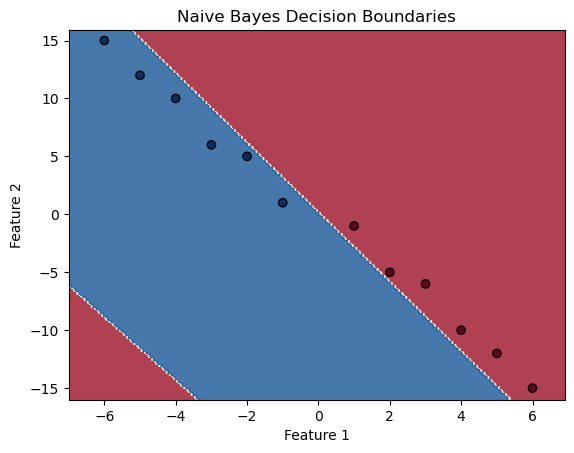

In [15]:
discriminant_values = []
classes_predicted = []

for i in range(len(discriminant)):
    discriminant_values.append(discriminant[i][0])
    classes_predicted.append(discriminant[i][1])

classes_predicted = np.array(classes_predicted).reshape(xx.shape)
plt.contourf(xx, yy, classes_predicted, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(train.iloc[:, 0], train.iloc[:, 1], c=train['y'], cmap=plt.cm.RdBu, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Naive Bayes Decision Boundaries')
plt.show()


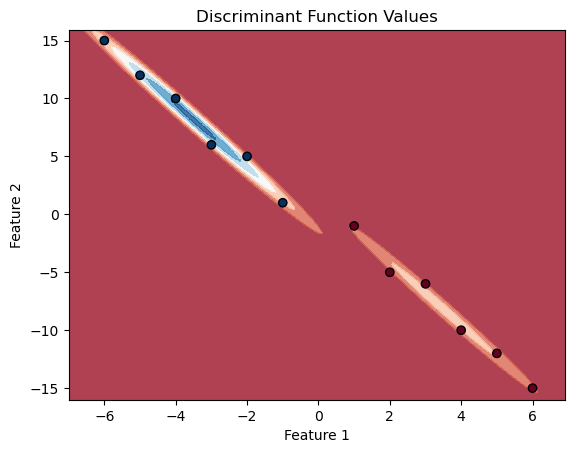

In [16]:
discriminant_values = np.array(discriminant_values).reshape(xx.shape)
plt.contourf(xx, yy, discriminant_values, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(train.iloc[:, 0], train.iloc[:, 1], c=train['y'], cmap=plt.cm.RdBu, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Discriminant Function Values')
plt.show()